## The SIR model

The SIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; infectives, I, who have already caught the disease and infect susceptibles; and recovered individuals, R. Since the disease is assumed not to be fatal, the sum $N=S+I+R$ remains constant. The rate at which the susceptibles get infected is 
$$
\lambda(t) = \frac{\beta I}{N}
$$
where the parameter $\beta$ is the probability of infection on contact. The infected individuals recover from the disease at a rate $\gamma$. Then, the ordinary differential equations of the SIR model are

\begin{align}
\dot S &= -\lambda(t)S \\
\dot I &= \lambda(t)I - \gamma I \\
\dot R &= \gamma I 
\end{align}

This example integrates the above equations to obtain what is called the **epidemic curve**: a plot of the number of susceptibles and infectives as a function of time. 

In [2]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [3]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from matplotlib import rc; rc('text', usetex=False)

In [12]:
M = 1                  # the SIR model has no age structure
Ni = 58500000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gamma = 0.1            # recovery rate 
alpha = 0              # fraction of asymptomatic infectives 
fsa   = 1              # the self-isolation parameter 


Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no recovered individuals initially 
S0  = N-(Ia0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 500;  Nt=2000; filename = 'this.mat'

# instantiate model
model = pyross.models.SIR(alpha, beta, gamma, fsa, M, Ni)

# simulate model
model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt, filename)

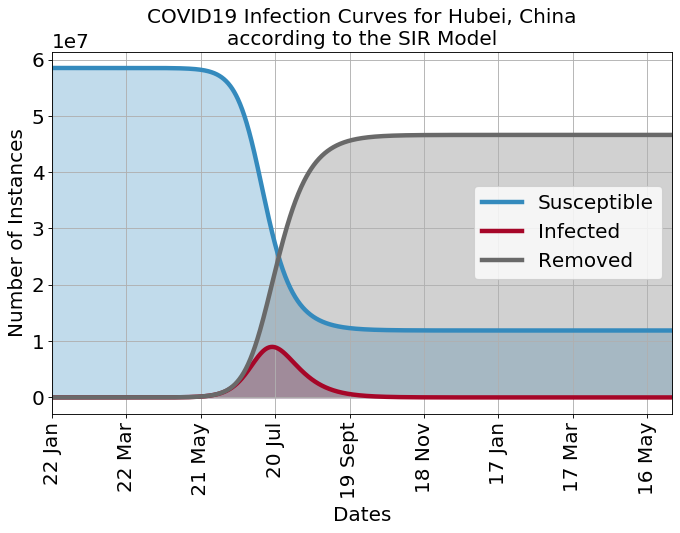

In [31]:
# plot the data and obtain the epidemic curve

from scipy.io import loadmat
data=loadmat(filename)

S  = data['X'][:,0].flatten()
Ia = data['X'][:,1].flatten()
Is = data['X'][:,2].flatten()
t = data['t'][0]

fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})


plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='Susceptible', lw=4)

plt.fill_between(t, 0, Is, color='#A60628', alpha=0.3)
plt.plot(t, Is, '-', color='#A60628', label='Infected', lw=4)

R=N-S-Ia-Is; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='Removed', lw=4)

plt.legend(fontsize=18); plt.grid() 
plt.xlabel('Dates')
plt.ylabel('Number of Instances')
plt.title('COVID19 Infection Curves for Hubei, China\naccording to the SIR Model', fontsize = 18)
plt.xticks(np.arange(0,Tf,60),('22 Jan','22 Mar',' 21 May','20 Jul','19 Sept', '18 Nov', '17 Jan', '17 Mar', '16 May'))
plt.xticks(rotation = 90)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()